In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm
%matplotlib inline

<font size='6'><b>Bayesian Machine Learning</b></font>

Table of Contents
<div id="toc"></div>

# 1. Bayesian Classifier (or Bayesian Decision Theory)

Given the height $x$ of a person, decide whether the person is male ($y=1$) or female ($y=0$).


- Binary Classes: $y\in \{0,1\}$ 

$$
\begin{align*}P(y=1 \mid x) &=\frac{P(x \mid y=1)P(y=1)}{P(x)} =\frac{ \underbrace{P(x \mid y=1)}_{\text{likelihood}} \underbrace{P(y=1)}_{\text{prior}}}{\underbrace{P(x)}_{\text{marginal}}} \\
P(y=0 \mid x) &=\frac{P(x \mid y=0)P(y=0)}{P(x)}
\end{align*}$$

- Decision

$$
\begin{align*}
\text{If} \; P(y=1 \mid x) > P(y=0 \mid x),\; \text{then} \; \hat{y} = 1 \\
\text{If} \; P(y=1 \mid x) < P(y=0 \mid x),\; \text{then} \; \hat{y} = 0
\end{align*}
$$

<br>

$$\therefore  \;
\frac{P(x \mid y=0)P(y=0)}{P(x \mid y=1)P(y=1)} \quad\begin{cases}
    >1 \quad \implies \; \hat{y}=0 \\
    =1 \quad \implies \; \text{decision boundary}\\
    <1 \quad \implies \; \hat{y}=1 
\end{cases}$$


## 1.1. Equal variance and equal prior

$$
\sigma_0 = \sigma_1 \qquad \text{and} \qquad P(y=0)=P(y=1)=\frac{1}{2}$$

$$P(x) = P(x \mid y=0) P(y=0) + P(x \mid y=1)P(y=1) = \frac{1}{2}\left\{ P(x \mid y=0) + P(x \mid y=1)\right\}$$

- Decision Boundary

$$P(y=0 \mid x)=P(y=1 \mid x)$$

<br>
<img src="./image_files/01.png" width = 600>
<br>

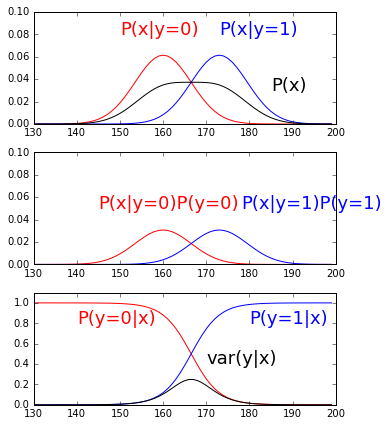

In [2]:
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (5, 6)

x = np.arange(130,200)
mu0 = 160
mu1 = 173
sigma0 = 6.5
sigma1 = 6.5

L1 = norm.pdf(x, mu0, sigma0)
L2 = norm.pdf(x, mu1, sigma1)

prior0 = 1./2.
prior1 = 1./2.

Px = L1*prior0 + L2*prior1
posterior0 = (L1*prior0)/Px;
posterior1 = (L2*prior1)/Px;

var1 = posterior1 - posterior1**2;

plt.subplot(3, 1, 1)
plt.plot(x, L1, 'r', x, L2, 'b', x, Px, 'k')
plt.axis([130, 200, 0, 0.1])
plt.text(mu0-10, 0.08, 'P(x|y=0)', color='red', fontsize = 18)
plt.text(mu1, 0.08, 'P(x|y=1)', color='blue', fontsize = 18)
plt.text(185, 0.03, 'P(x)', fontsize = 18)

plt.subplot(3, 1, 2)
plt.plot(x, L1*prior0, 'r', x, L2*prior1, 'b')
plt.axis([130, 200, 0, 0.1])
plt.text(mu0-15, 0.05, 'P(x|y=0)P(y=0)', color='red', fontsize = 18)
plt.text(mu1+5, 0.05, 'P(x|y=1)P(y=1)', color='blue', fontsize = 18)

plt.subplot(3, 1, 3)
plt.plot(x, posterior0, 'r', x, posterior1, 'b', x, var1, 'k')
plt.axis([130, 200, 0, 1.1])
plt.text(140, 0.8, 'P(y=0|x)', color='red', fontsize = 18)
plt.text(180, 0.8, 'P(y=1|x)', color='blue', fontsize = 18)
plt.text(170, 0.4, 'var(y|x)', fontsize = 18)

plt.tight_layout()

## 1.2. Equal variance and _not_ equal prior

$$
\sigma_0 = \sigma_1 \qquad \text{and} \qquad P(y=1) > P(y=0)
$$

<br>
<img src="./image_files/02.png" width = 600>
<br>

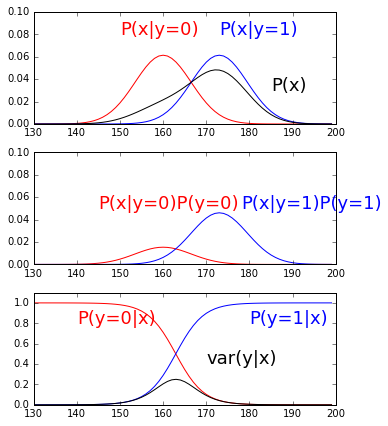

In [3]:
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (5, 6)

x = np.arange(130,200)
mu0 = 160
mu1 = 173
sigma0 = 6.5
sigma1 = 6.5

L1 = norm.pdf(x, mu0, sigma0)
L2 = norm.pdf(x, mu1, sigma1)

prior0 = 1./4.
prior1 = 3./4.

Px = L1*prior0 + L2*prior1
posterior0 = (L1*prior0)/Px;
posterior1 = (L2*prior1)/Px;

var1 = posterior1 - posterior1**2;

plt.subplot(3, 1, 1)
plt.plot(x, L1, 'r', x, L2, 'b', x, Px, 'k')
plt.axis([130, 200, 0, 0.1])
plt.text(mu0-10, 0.08, 'P(x|y=0)', color='red', fontsize = 18)
plt.text(mu1, 0.08, 'P(x|y=1)', color='blue', fontsize = 18)
plt.text(185, 0.03, 'P(x)', fontsize = 18)

plt.subplot(3, 1, 2)
plt.plot(x, L1*prior0, 'r', x, L2*prior1, 'b')
plt.axis([130, 200, 0, 0.1])
plt.text(mu0-15, 0.05, 'P(x|y=0)P(y=0)', color='red', fontsize = 18)
plt.text(mu1+5, 0.05, 'P(x|y=1)P(y=1)', color='blue', fontsize = 18)

plt.subplot(3, 1, 3)
plt.plot(x, posterior0, 'r', x, posterior1, 'b', x, var1, 'k')
plt.axis([130, 200, 0, 1.1])
plt.text(140, 0.8, 'P(y=0|x)', color='red', fontsize = 18)
plt.text(180, 0.8, 'P(y=1|x)', color='blue', fontsize = 18)
plt.text(170, 0.4, 'var(y|x)', fontsize = 18)

plt.tight_layout()

## 1.3. _Not_ equal variance and equal prior

$$
\sigma_0 \ne \sigma_1 \qquad \text{and} \qquad P(y=0)=P(y=1)=\frac{1}{2}$$

<br>
<img src="./image_files/03.png" width = 600>
<br>

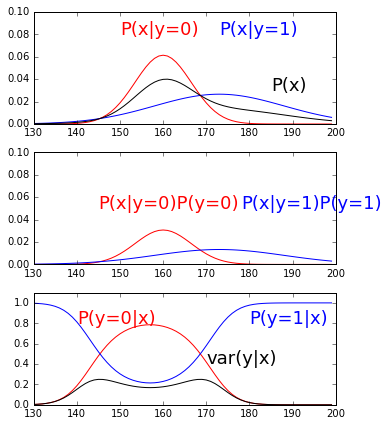

In [4]:
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (5, 6)

x = np.arange(130,200)
mu0 = 160
mu1 = 173
sigma0 = 6.5
sigma1 = 15

L1 = norm.pdf(x, mu0, sigma0)
L2 = norm.pdf(x, mu1, sigma1)

prior0 = 1./2.
prior1 = 1./2.

Px = L1*prior0 + L2*prior1
posterior0 = (L1*prior0)/Px;
posterior1 = (L2*prior1)/Px;

var1 = posterior1 - posterior1**2;

plt.subplot(3, 1, 1)
plt.plot(x, L1, 'r', x, L2, 'b', x, Px, 'k')
plt.axis([130, 200, 0, 0.1])
plt.text(mu0-10, 0.08, 'P(x|y=0)', color='red', fontsize = 18)
plt.text(mu1, 0.08, 'P(x|y=1)', color='blue', fontsize = 18)
plt.text(185, 0.03, 'P(x)', fontsize = 18)

plt.subplot(3, 1, 2)
plt.plot(x, L1*prior0, 'r', x, L2*prior1, 'b')
plt.axis([130, 200, 0, 0.1])
plt.text(mu0-15, 0.05, 'P(x|y=0)P(y=0)', color='red', fontsize = 18)
plt.text(mu1+5, 0.05, 'P(x|y=1)P(y=1)', color='blue', fontsize = 18)

plt.subplot(3, 1, 3)
plt.plot(x, posterior0, 'r', x, posterior1, 'b', x, var1, 'k')
plt.axis([130, 200, 0, 1.1])
plt.text(140, 0.8, 'P(y=0|x)', color='red', fontsize = 18)
plt.text(180, 0.8, 'P(y=1|x)', color='blue', fontsize = 18)
plt.text(170, 0.4, 'var(y|x)', fontsize = 18)

plt.tight_layout()

__Lecture 23 in [Learning Theory](http://www.shadmehrlab.org/Courses/learningtheory.html) (Reza Shadmehr, Johns Hopkins University)__

In [5]:
%%html
<iframe width="560" height="315" 
src="https://www.youtube.com/embed/3r5SlvjJptM" 
frameborder="0" allowfullscreen></iframe>

In [6]:
%%html
<iframe width="560" height="315" 
src="https://www.youtube.com/embed/X1WB6IJqMjM" 
frameborder="0" allowfullscreen></iframe>

# 2. Bayesian Density Estimation

In [7]:
%%html
<iframe width="560" height="315" 
src="https://www.youtube.com/embed/J5uQcuQ_fJ0" 
frameborder="0" allowfullscreen></iframe>

- Estimate a probability density function of a hidden state from multiple observations


<img src="./image_files/bayesian01.png" width = 250>
<br>

- $H$: Hypothesis, hidden state
- $D = \{d_1,d_2,\cdots,d_m\}$: data, observation, evidence

$$ P(H,D) = P(H \mid D)P(D) = P(D \mid H)P(H) $$

- Goal: $$ P(H \mid D) = \frac{P(D \mid H)P(H)}{P(D)}: \quad \text{ Bayes' Rule} $$

<br>
<img src="./image_files/bayesian02.png" width = 600>
<br>
<br>
<img src="./image_files/bayesian03.png" width = 600>
<br>
<br>
<img src="./image_files/bayesian04.png" width = 600>
<br>

In [8]:
%%html
<iframe width="420" height="315" 
src="https://www.youtube.com/embed/w1u6-_2jQJo" frameborder="0" allowfullscreen>
</iframe>

## 2.1. Combining Multiple Evidences

- Assume conditional independence (Markovian Property)


$$
\begin{align*} P(H \mid \underbrace{d_1,d_2,\cdots,d_m}_{\text{multiple evidences}}) &= \frac{P(d_1,d_2,\cdots,d_m \mid H) \; P(H)}{P(d_1,d_2,\cdots,d_m)}  \\ \\
&=\frac{P(d_1 \mid H)P(d_2 \mid H)\cdots P(d_m \mid H) \;P(H)}{P(d_1,d_2,\cdots,d_m)} \\ \\
&= \eta\prod\limits_{i=1}^m P(d_i \mid H)P(H), \qquad \eta: \text{normalizing}
\end{align*}$$

## 2.2. Recursive Bayesian Estimation

- two identities

$$ 
\begin{align*}P(a,b) &= P(a \mid b) P(b) \\
P(a,b \mid c) & = P(a \mid b,c) P(b \mid c)
\end{align*}$$

- When multiple $d_1, d_2, \cdots $

$$
\begin{align*}
P(H\mid d_1) &= \frac{P(d_1 \mid H) P(H)}{P(d_1)} = \eta_1 \, P(d_1 \mid H) \underbrace{P(H)}_{\text{prior}} \\
P(H\mid d_1 d_2) &= \frac{P(d_1 d_2\mid H) P(H)}{P(d_1 d_2)} = \frac{P(d_1 \mid H)P(d_2 \mid H) P(H)}{P(d_1 d_2)} = \eta_2 \, P(d_2 \mid H) \underbrace{P(H\mid d_1)}_{\text{acting as a prior}} \\
& \quad \vdots \\ \\
P(H \mid d_1,d_2,\cdots,d_m) &= \eta_m \,P(d_m \mid H) \underbrace{P(H \mid d_1,d_2,\cdots,d_{m-1})}_{\text{acting as a prior}} 
\end{align*}
$$

- Recursive


$$P_0(H) = P(H) \implies \; P(H \mid d_1)=P_1(H) \implies \; P(H \mid d_1 d_2) =  P_2(H) \implies \; \cdots$$


- Recursive Bayesian Estimation


<img src="./image_files/recursive.png" width = 600>

## 2.3. Example in 1D

<br>
<img src="./image_files/bayesian05.png" width = 550>

<img src="./image_files/bayesian06.png" width = 550>
<br>

Given model

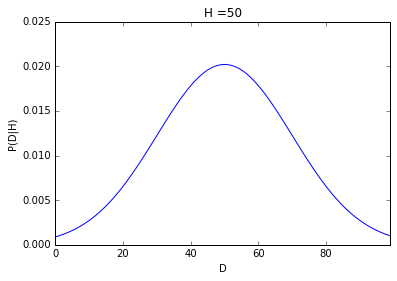

In [9]:
%matplotlib inline

H = 50 # if location of unknown object = 50
sigma = 20  # assume normal dist w/ sigma = 20

n = 100
x = range(0, n)

likelihood = norm.pdf(x, H, sigma)
likelihood = likelihood/np.sum(likelihood)

plt.plot(x, likelihood)
plt.axis('tight')
plt.ylim([0, 0.025])
plt.xlabel('D')
plt.ylabel('P(D|H)')
plt.title('H ='+ str(H))
plt.show()

Likelihood

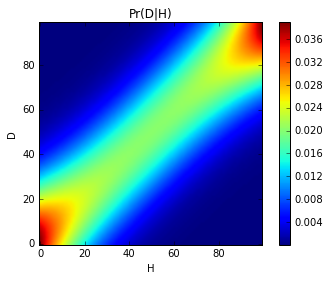

In [10]:
L = np.zeros((n, n)) #likelihood
%matplotlib inline
for h in range(0, n):
    L[:, [h]] = norm.pdf([x], h, sigma).T
    L[:, [h]] = L[:, [h]]/np.sum(L[:, [h]])

plt.imshow(L, origin="lower")
plt.colorbar()
plt.xlabel('H')
plt.ylabel('D')
plt.title('Pr(D|H)')

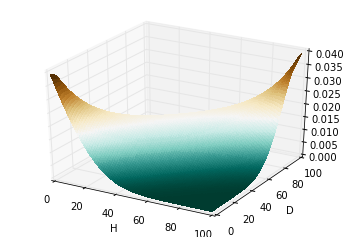

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
%matplotlib inline
fig = plt.figure()
ax = fig.gca(projection='3d')
[x1, x2] = np.meshgrid(x, x)
surf = ax.plot_surface(x1, x2, L, rstride=1, cstride=1, cmap=cm.BrBG_r,
                       linewidth=0, antialiased=False)
plt.xlabel('H')
plt.ylabel('D')


Suppose $H = 45$

C:\Anaconda3\lib\site-packages\ipykernel\__main__.py:30: VisibleDeprecationWarning: non integer (and non boolean) array-likes will not be accepted as indices in the future


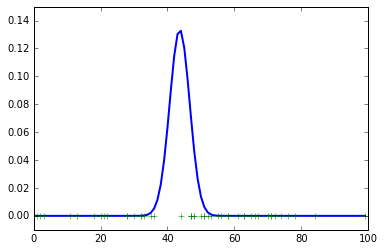

In [ ]:
%matplotlib inline
n = 100
x = np.arange(0, n)

sigma = 20.
L = np.zeros((n, n))

for h in range(0, n):
    L[:, [h]] = norm.pdf([x], h, sigma).T
    L[:, [h]] = L[:, [h]]/np.sum(L[:, [h]])
    
    
H = 45.

pr = np.ones((n, 1))/n
dh = np.zeros((50,1))

for i in range(50):
    d = np.round(np.random.normal(H, sigma))
    
    if d <= 0:
        d = 0
    elif d >= 99:
        d = 99 
        
    dh[i] = d
    
    
    
    po = L[[d],:].T*(pr)
    po = po/np.sum(po)
    
    pr = po
    
plt.plot(x, pr, linewidth = 2)
plt.plot(dh, np.zeros((dh.shape)), '+')
plt.ylim([-0.01, 0.15])
plt.show()
    #plt.pause(0.1)


In [ ]:
print (np.mean(dh))
print (np.argmax(po))

44.2
44


In [ ]:
%matplotlib inline
plt.hist(dh, 21)
plt.xlim([0, 100])
plt.title('Histogram of D')
plt.show()

## 2.4. Example in 2D

- [Online tutorial](http://studentdavestutorials.weebly.com/recursive-bayesian-estimation-with-matlab-code.html)

In [ ]:
%%html
<iframe width="560" height="315" 
src="https://www.youtube.com/embed/qsLF3KgavJk" frameborder="0" allowfullscreen>
</iframe>

In [ ]:
%%html
<iframe width="560" height="315" 
src="https://www.youtube.com/embed/dhsK-mRzxFw" frameborder="0" allowfullscreen>
</iframe>

__iSystems Demo__

<img src="./image_files/recurrisveBayesian_1.gif" width = 800>

In [ ]:
%%javascript
$.getScript('https://kmahelona.github.io/ipython_notebook_goodies/ipython_notebook_toc.js')